In [1]:
import matplotlib.pyplot as plt
import h5py  
import json
import numpy as np

In [89]:
def get_hdf5_data(filename):
    temp = {}

    with h5py.File(filename, 'r') as F:
        for gen in F.values():
            for trial in gen.values():
                param_dict = json.loads(trial['parameters'][...].tolist()) # get the parameters
                mse = json.loads(trial['mse'][...].tolist())
                temp_data = []
                temp_mean = []
                for item in trial['data'].values(): # get parameters objects
                    data = item['all_runs'][...]
                    means = item['mean'][...]
                    temp_mean.append(means)
                    temp_data.append(data) #append data


                temp[trial.name] = {}
                temp['name'] = filename.split('.')[0]
                temp[trial.name]['param'] = param_dict
                print(param_dict)
                print('-'*50)
                temp[trial.name]['data'] = temp_data
                temp[trial.name]['mean'] = temp_mean
                temp[trial.name]['mse'] = mse
    return temp



In [90]:
MCMC_mean = get_hdf5_data('MCMC_mean.hdf5')
MCMC_map = get_hdf5_data('MCMC_map.hdf5')
training_map = get_hdf5_data('training_map.hdf5')
model_mean = get_hdf5_data('model_mean.hdf5')
param_1 = get_hdf5_data('parameter_1.hdf5')
param_2 = get_hdf5_data('parameter_2.hdf5')
param_3 = get_hdf5_data('parameter_3.hdf5')

{'quarantining': True, 'contact_tracing': True, 'initial_infected_fraction': 0.005, 'initial_removed_fraction': 0.044, 'removed_cohorts': [], 'incubation_period': 6.152, 'serial_interval': 7.056, 'symptomatic_fraction': 0.214, 'recovery_days': 17, 'quarantine_days': 12, 'days_indetectable': 2, 'R0': 4.62, 'contact_rate': 7, 'npi_factor': 0.332, 'daily_outside_cases': [1, 0, 0, 0], 'contact_tracing_testing_rate': 0.785, 'contact_tracing_quarantine_rate': 1.146, 'contact_tracing_days': 1, 'daily_testing_fraction': 0.0, 'daily_testing_false_positive': 0.001, 'daily_testing_false_negative': 0.025, 'class_size_limit': 102, 'contact_upscale_factor': 0.753, 'friendship_contacts': 4.804, 'academic_contacts': 3.294, 'broad_social_contacts': 1.214, 'department_environmental_contacts': 4.131, 'broad_environmental_contacts': 3.501, 'residential_neighbors': 0.982, 'online_transition': 86, 'social_distancing': True, 'test': True, 'verbose': False, 'attendance_bins': [[0, 0.9], [-100, -10]], 'scenari

In [7]:
print(model_mean == MCMC_map)
print(type(model_mean['/gen_1/trial_1']['data']))



False
<class 'list'>


In [8]:
maxs = [0]*3
mins = [float('inf')]*3

def convert_name_num(name):
    if name == 'tests_performed_total':
        return 2
    if name == 'positive_tests_total':
        return 1
    if name == "active_cases":
        return 0



for keys in run_data.keys():
    mse_dict = run_data[keys]['mse']
    for mse_key, value  in mse_dict.items():
        if value > maxs[convert_name_num(mse_key)]:
            maxs[convert_name_num(mse_key)] = value
        if value < mins[convert_name_num(mse_key)]:
            mins[convert_name_num(mse_key)] = value
        
print(maxs)
print(mins)
        

NameError: name 'run_data' is not defined

In [9]:
with open('data.txt', 'r') as F:
    actual_data = json.load(F)

    
print(actual_data)

{'tests_performed_total': [6, 10, 14, 14, 14, 31, 60, 76, 93, 113, 113, 113, 113, 132, 151, 168, 195, 195, 213, 234, 268, 315, 353, 435, 435, 435, 479, 538, 594, 652, 717, 717, 717, 761, 807, 845, 900, 950, 972, 972, 1087, 1147, 1207, 1265, 1325, 1352, 1352, 1391, 1444, 1484, 1539, 1590, 1590, 1590, 1643, 1687, 1723, 1747, 1775, 1775, 1775, 1827, 1871, 1898, 1925, 1940, 1940, 1940, 1973, 1973, 2023, 2078, 2128, 2128, 2128, 2177, 2228, 2228, 2276, 2321, 2321, 2321, 2379, 2434, 2471, 2521, 2582, 2582, 2582, 2662, 2730, 2763, 2763, 2763, 2763, 2763, 2785, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808], 'positive_tests_total': [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 7, 10, 11, 12, 16, 19, 29, 43, 50, 54, 54, 57, 63, 72, 92, 100, 112, 112, 112, 123, 127, 130, 149, 156, 180, 182, 192, 207, 220, 221, 234, 240

In [44]:
'''
device = torch.device("cuda:0")
dict_numpy = np.array(transform_dict(model_data['/gen_1/trial_1']['param']), dtype=np.float32)
dict_torch = torch.from_numpy(dict_numpy)

dict_torch = dict_torch.to(device)


output1 = model(dict_torch)
output_list_1 = list(output1)
'''

for i in range(3):
    total = 0
    print(convert(i), 'mse found', MCMC_mean['/gen_1/trial_1']['mse'][convert(i)])
    mean = MCMC_mean['/gen_1/trial_1']['mean'][i]
    print('mean mse', ((mean - actual_data[convert(i)])**2).mean(axis=None))
    for data in MCMC_mean['/gen_1/trial_1']['data'][i]:
        total  += ((data - actual_data[convert(i)])**2).mean(axis=None)
    print('mse found', total/15)
    
    print('*'*20)

active_cases mse found 1183801.655429469
mean mse 1183801.655429469
mse found 1200997.5817708333
********************
positive_tests_total mse found 2942.9227388858117
mean mse 2942.9227388858117
mse found 3737.500520833333
********************
tests_performed_total mse found 24516.57904192307
mean mse 24516.57904192307
mse found 38653.739583333336
********************


In [86]:
print(param_1['/gen_1/trial_1']['param'])
print('*'*60)
print(param_2['/gen_1/trial_1']['param'])
print('*'*60)
print(param_3['/gen_1/trial_1']['param'])


{'quarantining': True, 'contact_tracing': True, 'initial_infected_fraction': 0.005, 'initial_removed_fraction': 0.044, 'incubation_period': 6.152, 'serial_interval': 7.056, 'symptomatic_fraction': 0.214, 'recovery_days': 17, 'quarantine_days': 12, 'days_indetectable': 2, 'R0': 4.62, 'contact_rate': 7, 'npi_factor': 0.332, 'contact_tracing_testing_rate': 0.785, 'contact_tracing_quarantine_rate': 1.146, 'contact_tracing_days': 1, 'daily_testing_fraction': 0.0, 'daily_testing_false_positive': 0.001, 'daily_testing_false_negative': 0.025, 'class_size_limit': 102, 'contact_upscale_factor': 0.753, 'friendship_contacts': 4.804, 'academic_contacts': 3.294, 'broad_social_contacts': 1.214, 'department_environmental_contacts': 4.131, 'broad_environmental_contacts': 3.501, 'residential_neighbors': 0.982, 'online_transition': 86, 'social_distancing': True}
************************************************************
{'quarantining': True, 'contact_tracing': True, 'initial_infected_fraction': 0.005,

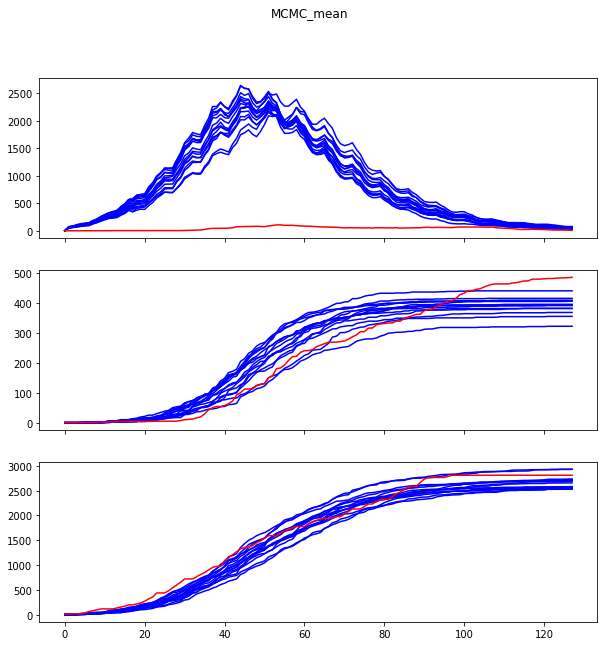

In [105]:
plt.rcParams["figure.figsize"] = (10,10)
def convert(i):
    if i == 0:
        return 'active_cases'
    if i == 1:
        return 'positive_tests_total'
    else:
        return 'tests_performed_total'
    

def compare_model(model_data, actual):
    '''
    red is actual
    green is mean of ABM
    magenta is surragote prediction o
    '''
    
    
    device = torch.device("cuda:0")
    dict_numpy = np.array(transform_dict(model_data['/gen_1/trial_1']['param']), dtype=np.float32)
    dict_torch = torch.from_numpy(dict_numpy)

    dict_torch = dict_torch.to(device)
    
    
    output1 = model(dict_torch)
    output_list_1 = list(output1)
    
    fig, axs = plt.subplots(3, sharex=True)
    fig.suptitle(model_data['name'])
    for key in model_data.keys():
        if key != 'name':
            for i in range(3):
                output_numpy_1 = output_list_1[i].cpu().data.numpy()
                e_output = np.exp(output_numpy_1)
                
                for data in model_data[key]['data'][i]:
                    axs[i].plot(data, 'b'
                               )
                #axs[i].plot(model_data[key]['mean'][i], 'g', zorder=1000)
                axs[i].plot(actual[convert(i)], 'r', zorder =1000
                           )
                #axs[i].plot(e_output, 'm', zorder=1000)
    plt.show()

compare_model(MCMC_mean, actual_data)

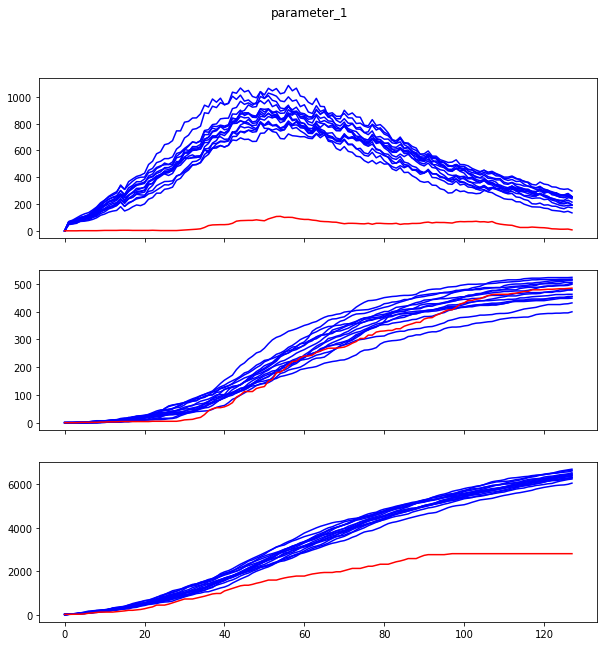

In [106]:

compare_model(param_1, actual_data)

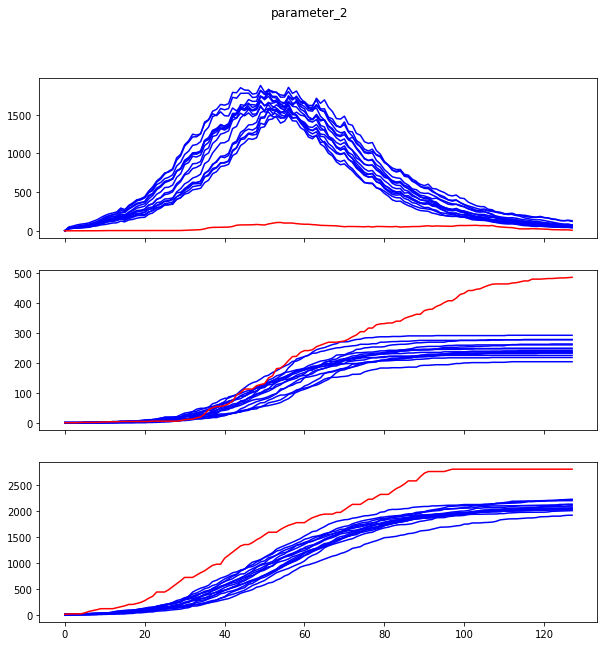

In [107]:
compare_model(param_2, actual_data)

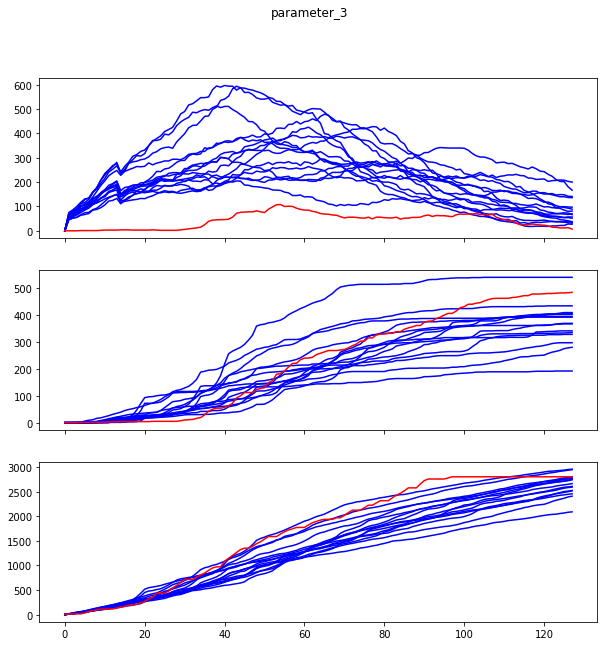

In [108]:
compare_model(param_3, actual_data)

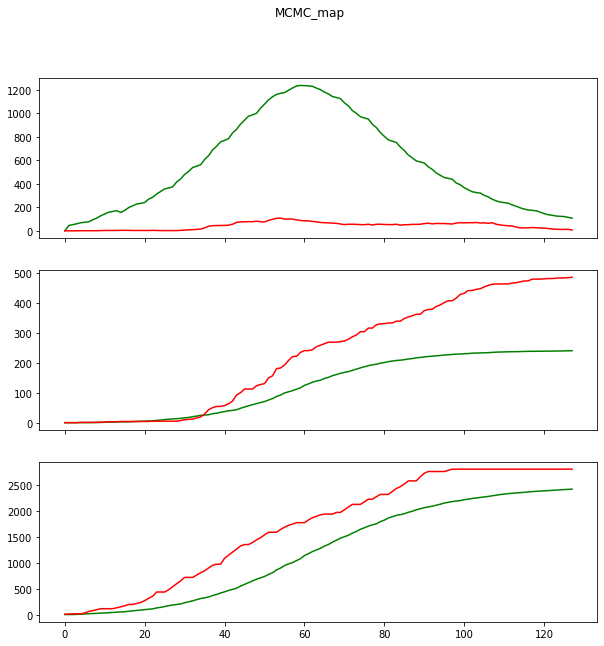

In [102]:
compare_model(MCMC_map, actual_data)

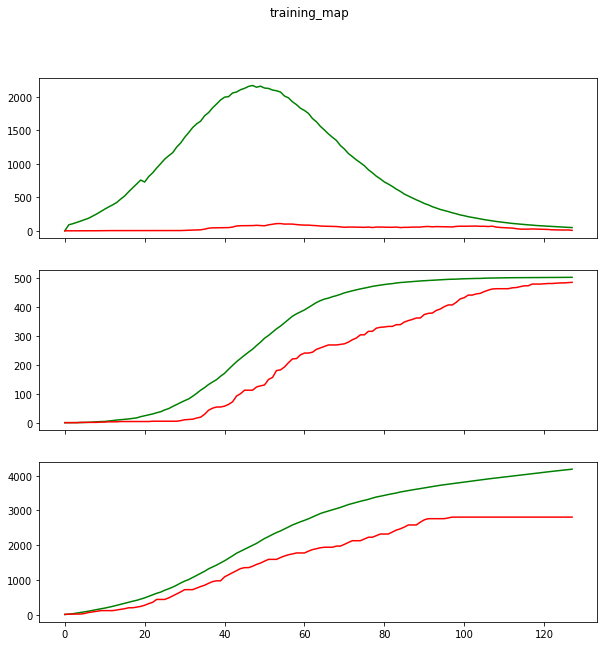

In [103]:
compare_model(training_map, actual_data)

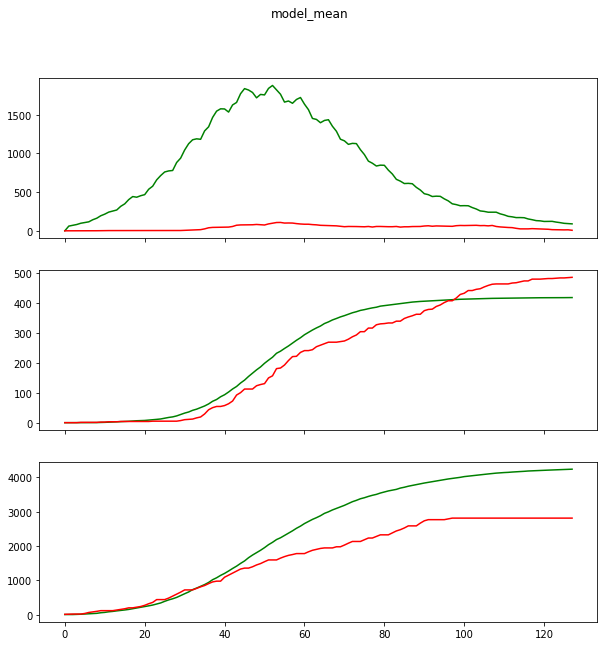

In [104]:
compare_model(model_mean, actual_data)

In [ ]:
print(max_array[1])

In [15]:
def transform_dict(dictionary, normalize=True):
        max_array = [1.00000000e+00, 1.00000000e+00, 9.76593370e-03, 9.84199921e-02,
         1.01921665e+01, 1.14792477e+01, 4.83156359e-01, 2.60000000e+01,
         2.70000000e+01, 5.00000000e+00, 7.53299818e+00, 3.70000000e+01,
         9.80590769e-01, 1.93074284e+00, 1.97044476e+00, 3.00000000e+00,
         9.68131379e-04, 1.97895609e-03, 5.86415329e-02, 2.89000000e+02,
         1.92786626e+00, 7.81984903e+00, 7.74460460e+00, 3.81878230e+00,
         7.97104863e+00, 7.82837484e+00, 1.98593690e+00, 1.84000000e+02,
         1.00000000e+00]
        min_array = [0.00000000e+00, 0.00000000e+00, 2.74451937e-04, 3.93191148e-03,
         1.50000000e+00, 1.50000000e+00, 1.02507890e-02, 2.00000000e+00,
         1.00000000e+00, 0.00000000e+00, 1.76806344e-01, 0.00000000e+00,
         2.05778794e-02, 2.36646161e-02, 6.95456769e-02, 0.00000000e+00,
         2.54113731e-05, 5.56704065e-05, 2.11450231e-03, 5.00000000e+00,
         2.87288530e-02, 3.41501120e-01, 1.77151849e-01, 1.14411160e-01,
         1.94728176e-01, 1.48689070e-01, 3.86031952e-02, 4.00000000e+00,
         0.00000000e+00]
        # remove unnessarry items from the parameter dictionarys
        bad_params = ['test','verbose','attendance_bins','scenario_name','parameter_checking',
                      'run_days', 'daily_outside_cases','removed_cohorts']
        for param in bad_params:
            dictionary.pop(param, 'None')
        # convert vlaues to numpy array format
        dict_vals = np.array(list(dictionary.values()), dtype=np.float32)
    
        
        
        # normalize the inputs
        if normalize:
            dict_vals = (np.subtract(dict_vals, min_array))/max_array
            
        
        return dict_vals



In [16]:
print(MCMC_map.keys())
print(MCMC_map['/gen_1/trial_1']['param'])
print(transform_dict(MCMC_map['/gen_1/trial_1']['param']))

dict_keys(['/gen_1/trial_1', 'name'])
{'quarantining': True, 'contact_tracing': True, 'initial_infected_fraction': 0.004, 'initial_removed_fraction': 0.034, 'removed_cohorts': [], 'incubation_period': 6.861, 'serial_interval': 7.524, 'symptomatic_fraction': 0.239, 'recovery_days': 14, 'quarantine_days': 12, 'days_indetectable': 2, 'R0': 2.945, 'contact_rate': 5, 'npi_factor': 0.404, 'daily_outside_cases': [1, 0, 0, 0], 'contact_tracing_testing_rate': 0.978, 'contact_tracing_quarantine_rate': 1.47, 'contact_tracing_days': 1, 'daily_testing_fraction': 0.0, 'daily_testing_false_positive': 0.001, 'daily_testing_false_negative': 0.029, 'class_size_limit': 124, 'contact_upscale_factor': 0.603, 'friendship_contacts': 4.755, 'academic_contacts': 2.975, 'broad_social_contacts': 1.493, 'department_environmental_contacts': 4.751, 'broad_environmental_contacts': 3.527, 'residential_neighbors': 0.912, 'online_transition': 91, 'social_distancing': True, 'test': True, 'verbose': False, 'attendance_bi

In [17]:
import torch
device = torch.device("cuda:0")
dict_numpy = np.array(transform_dict(MCMC_map['/gen_1/trial_1']['param']), dtype=np.float32)
dict_torch = torch.from_numpy(dict_numpy)

dict_torch = dict_torch.to(device)

In [18]:
import torch.nn.functional as F
import torch.nn as nn

class Network2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linput = nn.Linear(29, 150)
        self.lhidden = nn.Linear(150, 300)
        self.lhidden2 = nn.Linear(300,600)
        self.lhidden3 = nn.Linear(600, 300)
        self.lhidden4 = nn.Linear(300, 150)
        
        
        
        self.output10 = nn.Linear(150,300)
        self.output11 = nn.Linear(300,150)
        self.output12 = nn.Linear(150,128)
        
        self.output20 = nn.Linear(150, 300)
        self.output21 = nn.Linear(300, 150)
        self.output22 = nn.Linear(150,128)    
  
        
        self.output30 = nn.Linear(150,300)                
        self.output31 = nn.Linear(300,150)
        self.output32 = nn.Linear(150,128)
        
        
        
        self.leakyrelu = nn.LeakyReLU(1e-2)
        
    def forward(self, x, verbose=False):
        #simple network
        x = self.leakyrelu(self.linput(x))
        if verbose:
            print('input', x)
        x = self.leakyrelu(self.lhidden(x))
        #if verbose:
            #print('hidden 1', x)
        x = self.leakyrelu(self.lhidden2(x))
        if verbose:
            print('hidden 2', x)        
        x = self.leakyrelu(self.lhidden3(x))
        x = self.leakyrelu(self.lhidden4(x))
        if verbose:
            print('hidden 4', x)    
        
        # data specific heads
        x1 = self.leakyrelu(self.output10(x))
        x1 = self.leakyrelu(self.output11(x1)) 
        x1_output = self.leakyrelu(self.output12(x1))
        if verbose:
            print('output 12', x)   
            
        x2 = self.leakyrelu(self.output20(x))
        x2 = self.leakyrelu(self.output21(x2)) 
        x2_output = self.leakyrelu(self.output22(x2))
        
        if verbose:
            print('output 22', x2)  
        
        x3 = self.leakyrelu(self.output30(x))
        x3 = self.leakyrelu(self.output31(x3))
        x3_output = self.leakyrelu(self.output32(x3))
        if verbose:
            print('output 32', x3)  
        
        
        
        
        return x1_output, x2_output, x3_output
        
        
model = Network2()
model.to(torch.device("cuda:0"))
model.load_state_dict(torch.load('surragote_model.pt'))
model.eval()

Network2(
  (linput): Linear(in_features=29, out_features=150, bias=True)
  (lhidden): Linear(in_features=150, out_features=300, bias=True)
  (lhidden2): Linear(in_features=300, out_features=600, bias=True)
  (lhidden3): Linear(in_features=600, out_features=300, bias=True)
  (lhidden4): Linear(in_features=300, out_features=150, bias=True)
  (output10): Linear(in_features=150, out_features=300, bias=True)
  (output11): Linear(in_features=300, out_features=150, bias=True)
  (output12): Linear(in_features=150, out_features=128, bias=True)
  (output20): Linear(in_features=150, out_features=300, bias=True)
  (output21): Linear(in_features=300, out_features=150, bias=True)
  (output22): Linear(in_features=150, out_features=128, bias=True)
  (output30): Linear(in_features=150, out_features=300, bias=True)
  (output31): Linear(in_features=300, out_features=150, bias=True)
  (output32): Linear(in_features=150, out_features=128, bias=True)
  (leakyrelu): LeakyReLU(negative_slope=0.01)
)

In [20]:
model_output = model(dict_torch)